<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/DecisionTreePractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [13]:
X = df.drop('class', axis=1)
y = df['class']

In [14]:
clf = RandomForestClassifier(random_state=0)

params = {'n_estimators': range(10, 50, 10),
          'max_depth': range(1, 12, 2),
          'min_samples_leaf': range(1, 7),
          'min_samples_split': range(2, 9, 2)}

grid = GridSearchCV(clf, params, cv=3)
grid.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [15]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [18]:
best_clf = grid.best_estimator_
best_clf.fit(X, y)

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

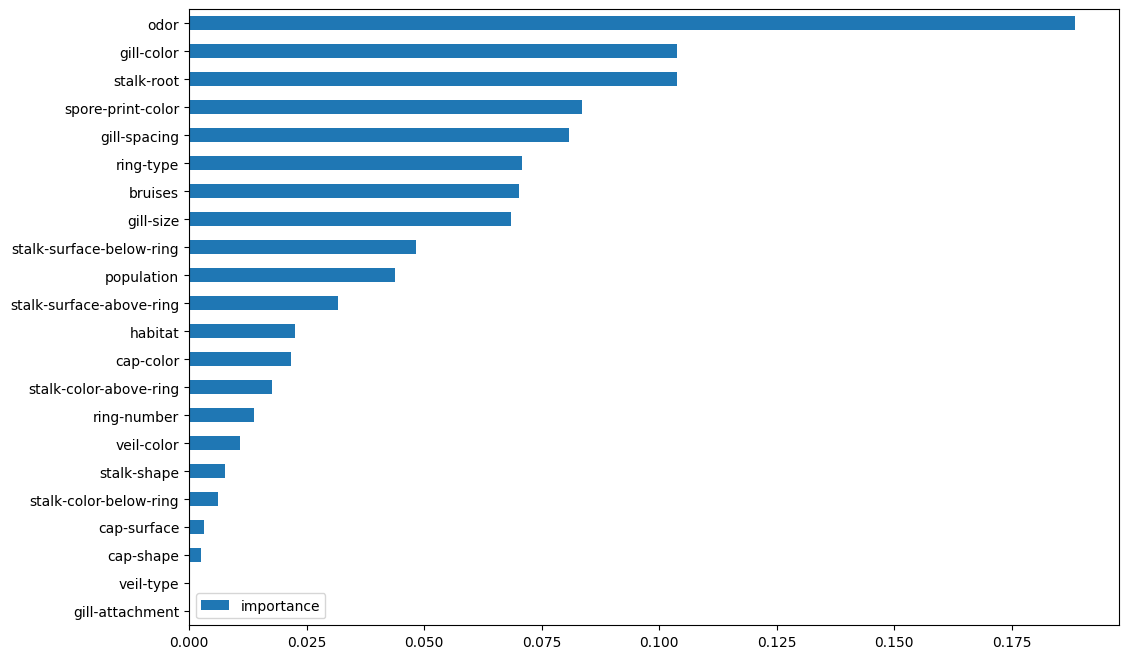

In [19]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

In [20]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [28]:
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [32]:
y_pred = best_clf.predict(df_test)
num_poisonous = len(y_pred[y_pred == 1])
num_poisonous

976

In [40]:
import zipfile
z = zipfile.ZipFile("/content/testing_y_mush.csv.zip")
txtfiles = z.infolist()
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd='Cool!Move_forward!'.encode('cp850', 'replace')))

<Axes: >

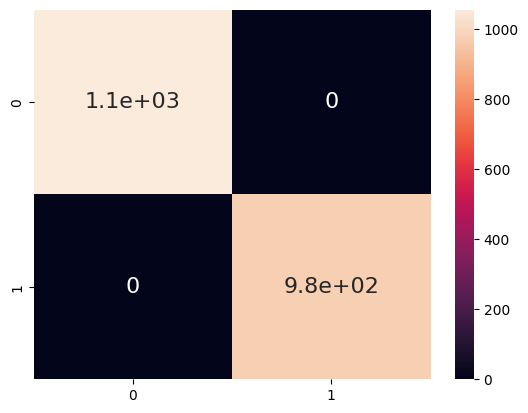

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,annot_kws={"size": 16})